News Sharing dataset available for download at
https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity


## Goal:
I have implemented the following two algorithms:
1. Linear regression
2. Logistic regression


## Tasks:
1. Divide the dataset into train and test sets sampling randomly. Use only predictive attributes and
the target variable (do not use non-predictive attributes).
2. Use linear regression to predict the number of shares. Report and compare your train and test
error/accuracy metrics. you can pick any metrics you like (e.g. mean squared error, mean
absolute error, etc.)


In [101]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import scipy.optimize as opt 
import random 
from sklearn.metrics import confusion_matrix
%matplotlib inline

def gradientDescent_LinearRegression(X,y,theta, alpha, iterations):
    m = len(X)
    temp = np.matrix(np.zeros(theta.shape))
    params = int(theta.shape[1])
    cost = np.zeros(iters)
        
    for i in range(iters):
        error = (X*theta.T) - y
        
        for j in range(params):
            term = np.multiply(error,X[:,j])
            temp[0,j] = theta[0,j] - (1/m)*alpha*np.sum(term)
            
        theta = temp
        cost[i] = costFunction_LinearRegression(X,y,theta)
  
    return theta , cost

def costFunction_LinearRegression(X_train,y_train,theta):
    m = len(y_train) 
    J = np.sum(np.power(((X_train*theta.T) - y_train),2))/(2*m)
    return J


def data_preparation(data,colNos):
    
    # slicing non-predictive attributes
    #if('url' in data.columns and 'timedelta' in data.columns):
    data = data.drop(["url"," timedelta"], axis=1)
    
    if colNos == "All":
        pass
    else:
        colNos.append(58) # Adding last coulumn "shares" 
        data = data[data.columns[colNos]]  
        
    cols = data.shape[1]  
    train, test = train_test_split(data, test_size=0.3,random_state=0)

    X_train=train.iloc[:,0:cols-1]
    y_train=train.iloc[:,cols-1:cols]

    X_test=test.iloc[:,0:cols-1]
    y_test=test.iloc[:,cols-1:cols]

    #Normalization
    X_train = (X_train - X_train.mean())/ (X_train.max() - X_train.min())
    X_test = (X_test - X_test.mean())/ (X_test.max() - X_test.min())

    X_train.insert(0, 'X0', 1)
    X_test.insert(0, 'X0', 1)
 
    X_train = np.matrix(X_train.values)  
    X_test = np.matrix(X_test.values)  
    y_train = np.matrix(y_train.values)  
    y_test = np.matrix(y_test.values)  
    theta = np.matrix(np.zeros([1,X_train.shape[1]]))

    return X_train,X_test,y_train,y_test,theta

def results_Linear(theta,X,y,data_set):
    y_predictions = X*OptTheta.T
    print("____________________________________________________")
    print("Linear Regression | Running the algo on "+data_set)
    print("Mean squared error = {}".format(round(mean_squared_error(y,y_predictions),4)))    
    print("Mean Absolute error = {}".format(round(mean_absolute_error(y,y_predictions),4)))
    print("____________________________________________________")



In [102]:
# Linear Regression

data = pd.read_csv("onlineNewsPopularity.csv")

X_train,X_test,y_train,y_test,theta = data_preparation(data,"All")

alpha = 0.05
iters = 500
OptTheta, cost = gradientDescent_LinearRegression(X_train, y_train, theta, alpha, iters)  
y_predictions = X_test*OptTheta.T

results_Linear(theta,X_train,y_train,"Train Data")
results_Linear(theta,X_test,y_test,"Test Data")



____________________________________________________
Linear Regression | Running the algo on Train Data
Mean squared error = 161683950.117
Mean Absolute error = 3177.7535
____________________________________________________
____________________________________________________
Linear Regression | Running the algo on Test Data
Mean squared error = 66972536.6865
Mean Absolute error = 3028.0737
____________________________________________________


## Tasks:

3 Convert this problem into a binary classification problem. The target variable should have two values (large or small number of shares).

# I divided the data by using median as the baseline

4  Implement logistic regression to carry out classification on this data set. Report accuracy/error metrics for train and test sets.

In [103]:
def sigmoid(z):
    return 1 / ( 1 + np.exp(-z))

def costFunction_LogisticRegression(theta,X,y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y,np.log(sigmoid(X*theta.T)))
    second = np.multiply((1-y),np.log(1-sigmoid(X*theta.T)))
    return np.sum((first - second)/len(X))

def gradientDescent_LogisticRegression(theta,X,y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    params = int(theta.ravel().shape[1])
    grad = np.zeros(params)
    
    error = sigmoid(X*theta.T) - y
    
    for i in range(params):
        term = np.multiply(error,X[:,i])
        grad[i] = np.sum(term) / len(X)
    
    return grad

def predictions_logistic(theta,X):
    probability = sigmoid(X*theta.T)
    return [1 if x >=0.5 else 0 for x in probability]

def results_Logistic(theta,X,y,data_set):
    y_predictions = np.matrix(predictions_logistic(theta,X)).T
    temp = (y_predictions == y)
    accuracy = (temp.sum()/temp.shape[0])*100
    print("____________________________________________________")
    print("Logistic Regression | Running the algo on "+data_set)
    print("Accuracy is {} %".format(round(accuracy,2)))
    print("Confusion Matrix = \n{}".format(confusion_matrix(y,y_predictions)))    
    print("Mean Absolute error = {}".format(round(mean_absolute_error(y,y_predictions),4)))
    print("____________________________________________________")

In [104]:
#Logistic regression

data = pd.read_csv("onlineNewsPopularity.csv")

median = data[' shares'].median()
data[' shares'] = np.where(data[' shares']>=median, 1, 0)

# 1: represents Large
# 0: represents Small

X_train,X_test,y_train,y_test,theta = data_preparation(data,"All")

result = opt.fmin_tnc(func=costFunction_LogisticRegression, x0=theta, fprime=gradientDescent_LogisticRegression, args=(X_train, y_train))  
OptTheta = np.matrix(result[0])

#cost_logistic_regression(OptTheta, X_train, y_train)  

results_Logistic(OptTheta,X_test,y_test,"Test set")
results_Logistic(OptTheta,X_train,y_train,"Train set")

____________________________________________________
Logistic Regression | Running the algo on Test set
Accuracy is 64.32 %
Confusion Matrix = 
[[3232 2353]
 [1891 4418]]
Mean Absolute error = 0.3568
____________________________________________________
____________________________________________________
Logistic Regression | Running the algo on Train set
Accuracy is 65.81 %
Confusion Matrix = 
[[ 7820  5085]
 [ 4404 10441]]
Mean Absolute error = 0.3419
____________________________________________________


## Experimentation:
1. Experiment with various model parameters for both linear and logistic regression and report on your findings as how the error varies for train and test sets with varying these parameters. Plot the results. Report your best parameters. Examples of these parameters can be learning rate for gradient descent, convergence threshold, etc.
2. Pick ten features randomly and retrain your model only on these ten features. Compare train and test error results for the case of using all features to using ten random features. Report which ten features did you select randomly.
3. Now pick ten features that you think are best suited to predict the output, and retrain your model using these ten features. Compare to the case of using all features and to random features case. Did your choice of features provide better results than picking random features? Why? Did your choice of features provide better results than using all features? Why?


# Experiment 1

## Changing learning rate ( alpha ) 

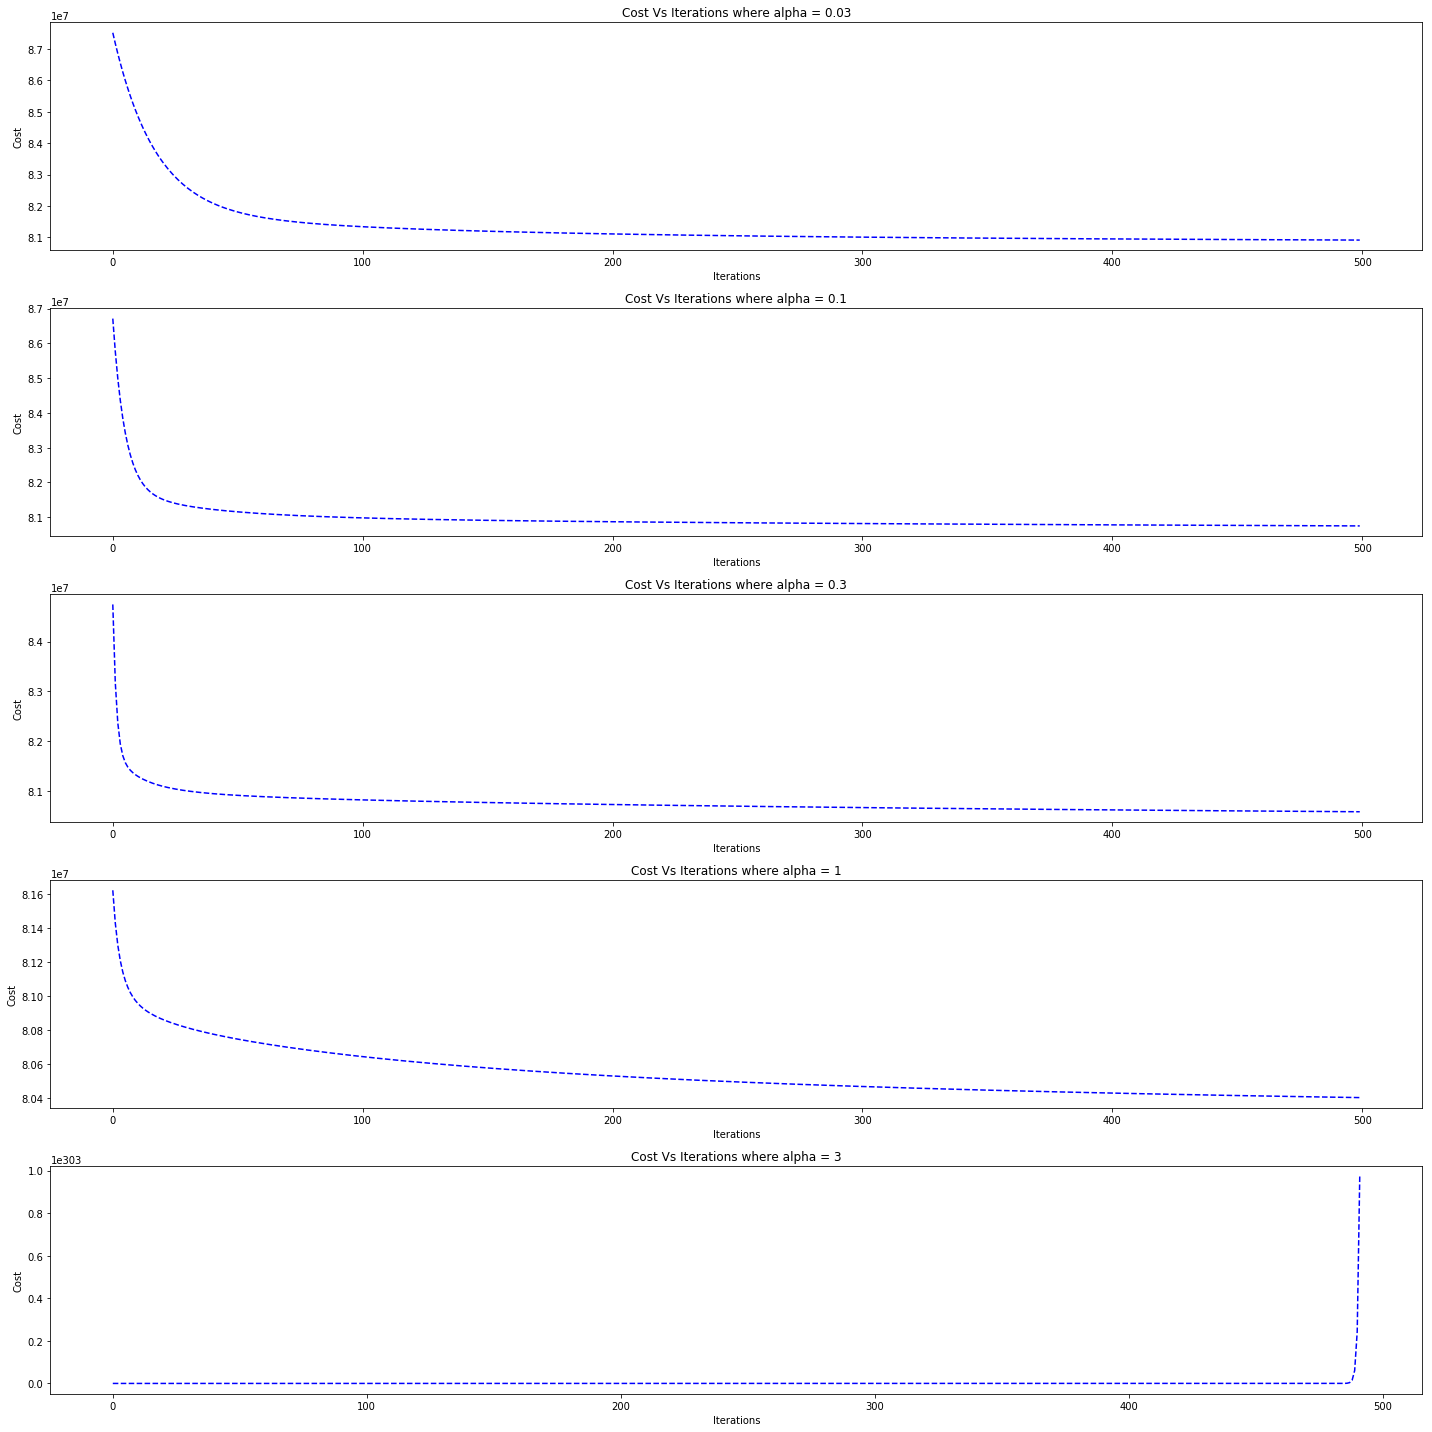

In [107]:
# Linear Regression

data = pd.read_csv("onlineNewsPopularity.csv")

X_train,X_test,y_train,y_test,theta = data_preparation(data,"All")
  
iters = 500
fig, ax = plt.subplots(figsize=(20,20))  
sample=[1,2,3,4,5]
count = 510
for alpha in [0.03,0.1,0.3,1,3]:
    count+=1
    OptTheta, cost = gradientDescent_LinearRegression(X_train, y_train, theta, alpha, iters)  
    sample[count-511] = cost
    plt.subplot(count)
    plt.plot(np.arange(iters), sample[count-511], 'b--')
    plt.title('Cost Vs Iterations where alpha = {}'.format(alpha))
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.tight_layout()

# Experiment 2
## Implement linear regression with 10 random features

In [108]:
# Linear Regression

data = pd.read_csv("onlineNewsPopularity.csv")

X_train,X_test,y_train,y_test,theta = data_preparation(data,random.sample(range(0,58),10))

alpha = 0.05
iters = 500
OptTheta, cost = gradientDescent_LinearRegression(X_train, y_train, theta, alpha, iters)  

#print(OptTheta)
#print(costFunction(X_train,y_train,OptTheta))

results_Linear(OptTheta,X_train,y_train,"Train data")
results_Linear(OptTheta,X_test,y_test,"Test data")

____________________________________________________
Linear Regression | Running the algo on Train data
Mean squared error = 163207040.7228
Mean Absolute error = 3244.0628
____________________________________________________
____________________________________________________
Linear Regression | Running the algo on Test data
Mean squared error = 68010908.1032
Mean Absolute error = 3099.5404
____________________________________________________


# Experiment 3
## linear regression with Parameters that I  think are best suited to predict the output

In [109]:
# Linear Regression

data = pd.read_csv("onlineNewsPopularity.csv")

data = data[['url',' timedelta',' is_weekend',' n_tokens_title',' num_imgs',' num_videos',' global_subjectivity',' global_sentiment_polarity',' global_rate_positive_words',' title_subjectivity',' title_sentiment_polarity',' abs_title_subjectivity',' shares']]

X_train,X_test,y_train,y_test,theta = data_preparation(data,"All")

alpha = 0.05
iters = 500
OptTheta, cost = gradientDescent_LinearRegression(X_train, y_train, theta, alpha, iters)  

results_Linear(theta,X_train,y_train,"Train Data")
results_Linear(theta,X_test,y_test,"Test Data")


____________________________________________________
Linear Regression | Running the algo on Train Data
Mean squared error = 163613361.021
Mean Absolute error = 3267.2118
____________________________________________________
____________________________________________________
Linear Regression | Running the algo on Test Data
Mean squared error = 68073309.3791
Mean Absolute error = 3112.5479
____________________________________________________


# Experimentation 4
## Drop Highly Correlated Features (greater than 0.75)

In [110]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] >= threshold:
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

    return dataset

In [111]:
# Linear Regression

data = pd.read_csv("onlineNewsPopularity.csv")
data = correlation(data,0.75)

X_train,X_test,y_train,y_test,theta = data_preparation(data,"All")

alpha = 0.05
iters = 500
OptTheta, cost = gradientDescent_LinearRegression(X_train, y_train, theta, alpha, iters)  

results_Linear(theta,X_train,y_train,"Train Data")
results_Linear(theta,X_test,y_test,"Test Data")


____________________________________________________
Linear Regression | Running the algo on Train Data
Mean squared error = 161798950.1664
Mean Absolute error = 3184.893
____________________________________________________
____________________________________________________
Linear Regression | Running the algo on Test Data
Mean squared error = 67079332.6306
Mean Absolute error = 3035.4763
____________________________________________________
